In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
dataset = pd.read_excel(r"D:\Data Science\Innomatics Internship\Data Analysis\AMEO Data Analysis\aspiring_minds_employability_outcomes_2015.xlsx")

In [146]:
dataset.shape

(3998, 39)

In [147]:
dataset.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [148]:
dataset.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Data Cleaning

In [149]:
#dropping unnamed column
df = dataset.drop('Unnamed: 0', axis=1)

In [150]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [152]:
import datetime as dt

In [153]:
df["DOJ"] = pd.to_datetime(df["DOJ"]).dt.date

In [154]:
#since its 2015 data lets replace present with 2016
#we will consider 2016 as people still working 
df["DOL"].replace("present", dt.datetime(2016, 1, 1, 0, 0, 0), inplace=True)

In [155]:
#making period column which shows how long the person has worked 
df["Period"] = pd.to_datetime(df["DOL"]).dt.year - pd.to_datetime(df["DOJ"]).dt.year

In [156]:
df["DOB"] = pd.to_datetime(df["DOB"]).dt.year

In [157]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
0,203097,420000,2012-06-01,2016-01-01,senior quality engineer,Bangalore,f,1990,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,4
1,579905,500000,2013-09-01,2016-01-01,assistant manager,Indore,m,1989,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,3
2,810601,325000,2014-06-01,2016-01-01,systems engineer,Chennai,f,1992,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,2
3,267447,1100000,2011-07-01,2016-01-01,senior software engineer,Gurgaon,m,1989,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,5
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


In [158]:
df["Salary"].unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,   80000,  330000,
        380000,  110000,  205000,   95000,  390000,   60000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000,  100000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000, 1200000,  675000,  105000,  195000,  385000,  235000,
        615000,  290000,  140000,  405000, 1860000,  375000,  430000,
        660000,   70000,  410000,  550000,   35000,  115000,  415000,
        265000,  285000,  245000,  395000,  560000,  700000,  185000,
        160000,  625000,   85000,  135000,  785000,  210000,  155000,
        355000,  535000,  690000,  260000, 1110000, 1000000,  505000,
        475000,  715

In [159]:
df["Designation"].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [160]:
df[df["Designation"] == 'get']["Specialization"]

4       electronics and communication engineering
332                     mechanical and automation
350                        electrical engineering
1717                       mechanical engineering
1897                       mechanical engineering
2140                       mechanical engineering
2318       electronics and electrical engineering
2443                       mechanical engineering
2666       electronics and electrical engineering
2757                       mechanical engineering
3045       electronics and electrical engineering
3126                       mechanical engineering
3594                       mechanical engineering
3980                       mechanical engineering
Name: Specialization, dtype: object

In [161]:
df[df["Designation"] == 'ase']["Specialization"]

27      electronics and communication engineering
2792                       information technology
3839                       electrical engineering
Name: Specialization, dtype: object

In [162]:
#mode of ppl with mech_eng and mode of ppl with eee
mech_eng = df[df['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]
eee = df[df['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]

In [163]:
print(mech_eng, eee)

production engineer system engineer


In [164]:
# replacing 'get' with mode of  mech_eng and mode of eee accordingly
df.loc[df['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('get',mech_eng,inplace=True)
df['Designation'].replace('get',eee,inplace=True)

In [165]:
#only 3 'ase' values'
#repalcing 'ase' to 'assistant system engineer'
df["Designation"].replace("ase","assistant system engineer", inplace=True)

In [166]:
df["JobCity"].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [167]:
mode_value = df['JobCity'].mode()[0]

In [168]:
#replacing -1 value with mode of JobCity
df['JobCity'].replace("-1", mode_value, inplace=True)

In [169]:
df['JobCity'] = df['JobCity'].str.strip()

In [170]:
df['JobCity'].value_counts().head(10)

Bangalore    641
Noida        370
Hyderabad    345
Pune         296
Chennai      280
Gurgaon      205
New Delhi    198
Mumbai       112
Kolkata       99
Jaipur        47
Name: JobCity, dtype: int64

In [171]:
#cleaning city names which are in top 10 thats with minimum 100
df["JobCity"].replace("Bangalore","Bengaluru",inplace=True)
df["JobCity"].replace("Banglore","Bengaluru",inplace=True)
df["JobCity"].replace("BANGLORE","Bengaluru",inplace=True)
df["JobCity"].replace("bengaluru","Bengaluru",inplace=True)
df["JobCity"].replace("Banaglore","Bengaluru",inplace=True)
df["JobCity"].replace("bangalore","Bengaluru",inplace=True)
df["JobCity"].replace("Bangalore","Bengaluru",inplace=True)
df["JobCity"].replace("Asifabadbanglore","Bengaluru",inplace=True)
df["JobCity"].replace("BAngalore","Bengaluru",inplace=True)
df["JobCity"].replace("BANGALORE","Bengaluru",inplace=True)
df["JobCity"].replace("Banagalore","Bengaluru",inplace=True)
df["JobCity"].replace("banglore","Bengaluru",inplace=True)
df["JobCity"].replace("CHENNAI","Chennai",inplace=True)
df["JobCity"].replace("Chennai & Mumbai","Chennai",inplace=True)
df["JobCity"].replace("chennai","Chennai",inplace=True)
df["JobCity"].replace("Chennai, Bangalore","Chennai",inplace=True)
df["JobCity"].replace("HYDERABAD","Hyderabad",inplace=True)
df["JobCity"].replace("hderabad","Hyderabad",inplace=True)
df["JobCity"].replace("Navi Mumbai , Hyderabad","Hyderabad",inplace=True)
df["JobCity"].replace("Jabalpur', 'hyderabad","Hyderabad",inplace=True)
df["JobCity"].replace("hyderabad(bhadurpally)","Hyderabad",inplace=True)
df["JobCity"].replace("hyderabad","Hyderabad",inplace=True)
df["JobCity"].replace("noida","Noida",inplace=True)
df["JobCity"].replace("NOIDA","Noida",inplace=True)
df["JobCity"].replace("Greater noida","Noida",inplace=True)
df["JobCity"].replace("NOIDA', 'Greater noida","Noida",inplace=True)
df["JobCity"].replace("Nouda","Noida",inplace=True)
df["JobCity"].replace("A-64,sec-64,noida","Noida",inplace=True)
df["JobCity"].replace("GREATER NOIDA","Noida",inplace=True)
df["JobCity"].replace("Greater NOIDA","Noida",inplace=True)
df["JobCity"].replace("Greater NOIDA","Noida",inplace=True)
df["JobCity"].replace("Greater Noida","Noida",inplace=True)
df["JobCity"].replace("pune","Pune",inplace=True)
df["JobCity"].replace("PUNE","Pune",inplace=True)
df["JobCity"].replace("punr","Pune",inplace=True)
df["JobCity"].replace("GURGOAN","Gurgaon",inplace=True)
df["JobCity"].replace("gurgaon","Gurgaon",inplace=True)
df["JobCity"].replace("gurgoan","Gurgaon",inplace=True)
df["JobCity"].replace("Gurgoan","Gurgaon",inplace=True)
df["JobCity"].replace("GURAGAON","Gurgaon",inplace=True)
df["JobCity"].replace("GURGAON","Gurgaon",inplace=True)
df["JobCity"].replace("Delhi","New Delhi",inplace=True)
df["JobCity"].replace("delhi","New Delhi",inplace=True)
df["JobCity"].replace("new delhi - jaisalmer","New Delhi",inplace=True)
df["JobCity"].replace("New delhi","New Delhi",inplace=True)
df["JobCity"].replace("DELHI","New Delhi",inplace=True)
df["JobCity"].replace("Delhi/NCR","New Delhi",inplace=True)
df["JobCity"].replace("new dehli","New Delhi",inplace=True)
df["JobCity"].replace("NEW DELHI","New Delhi",inplace=True)
df["JobCity"].replace("new delhi","New Delhi",inplace=True)
df["JobCity"].replace("mumbai","Mumbai",inplace=True)
df["JobCity"].replace("MUMBAI","Mumbai",inplace=True)
df["JobCity"].replace("kolkata","Kolkata",inplace=True)
df["JobCity"].replace("Kolkata`","Kolkata",inplace=True)
df["JobCity"].replace("KOLKATA","Kolkata",inplace=True)

In [172]:
df["Gender"].unique()

array(['f', 'm'], dtype=object)

In [174]:
df["12graduation"].unique()

array([2007, 2010, 2008, 2009, 2006, 2011, 2005, 1995, 2004, 2012, 2003,
       2002, 2001, 1998, 2013, 1999], dtype=int64)

In [175]:
df["10percentage"].unique()

array([84.3 , 85.4 , 85.  , 85.6 , 78.  , 89.92, 86.08, 92.  , 90.  ,
       77.  , 88.6 , 81.  , 83.6 , 60.8 , 81.2 , 69.54, 85.8 , 65.  ,
       79.  , 91.2 , 75.67, 92.5 , 70.  , 88.  , 86.8 , 90.88, 76.8 ,
       84.  , 64.  , 77.2 , 87.  , 73.  , 71.  , 91.5 , 52.33, 66.6 ,
       75.  , 91.4 , 59.  , 84.5 , 95.8 , 69.6 , 86.6 , 81.92, 66.5 ,
       80.  , 85.2 , 89.25, 58.4 , 90.8 , 89.88, 63.3 , 72.  , 83.  ,
       85.3 , 60.66, 89.37, 84.4 , 89.  , 86.  , 70.6 , 93.44, 76.  ,
       86.4 , 84.83, 72.3 , 69.  , 73.33, 86.16, 56.  , 79.25, 88.66,
       80.8 , 81.16, 83.5 , 55.6 , 84.6 , 62.  , 68.4 , 51.  , 79.6 ,
       63.4 , 86.53, 76.18, 91.43, 76.17, 82.4 , 58.  , 90.04, 60.4 ,
       74.23, 59.8 , 82.3 , 84.2 , 60.  , 82.8 , 82.6 , 74.  , 89.8 ,
       88.67, 64.66, 77.8 , 89.5 , 64.56, 91.12, 73.08, 78.33, 81.33,
       89.7 , 87.4 , 92.66, 76.87, 91.3 , 77.9 , 76.2 , 77.78, 65.6 ,
       65.8 , 67.75, 91.6 , 78.66, 78.4 , 61.  , 90.4 , 58.6 , 82.2 ,
       82.  , 90.1 ,

In [176]:
df["10board"].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', 0, 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'mat

In [177]:
df["12board"].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [178]:
df["Domain"].unique()

array([ 0.63597876,  0.96060325,  0.45087658,  0.97439611,  0.12450207,
       -1.        ,  0.35653649,  0.8295846 ,  0.69447933,  0.49359639,
        0.76567358,  0.9682375 ,  0.22948175,  0.53838689,  0.30840058,
        0.91139528,  0.56326782,  0.86468541,  0.64938971,  0.74475835,
        0.88412251,  0.88162007,  0.20739217,  0.48674701,  0.67074315,
        0.62264292,  0.41383826,  0.52592258,  0.73579571,  0.13044174,
        0.23780284,  0.11213944,  0.37755142,  0.06696071,  0.08005528,
        0.92564577,  0.84312373,  0.91686996,  0.78330354,  0.60005718,
        0.79293628,  0.79358061,  0.16563309,  0.75537512,  0.99990456,
        0.33878635,  0.91077016,  0.98205712,  0.84224832,  0.01854094,
        0.05316031,  0.94211655,  0.12301673,  0.48834798,  0.37605959,
        0.0587928 ,  0.10487136,  0.60064396,  0.70409041,  0.14478989,
        0.81941653,  0.65576694,  0.02106623,  0.44461772,  0.83762073,
        0.72598415,  0.95389978,  0.04099931,  0.02196911,  0.34

<AxesSubplot: >

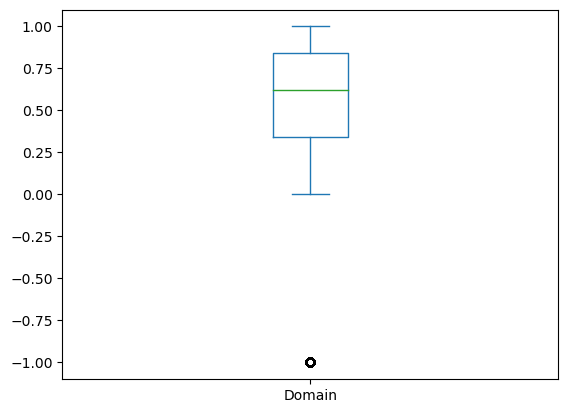

In [179]:
df['Domain'].plot(kind='box')

In [182]:
#we can use median here to fill the values that have -1
df['Domain'].replace(-1,df['Domain'].median(),inplace=True)

In [183]:
df['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [184]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [185]:
filtered_specialization ={'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [186]:
df['Specialization'] = df['Specialization'].map(filtered_specialization)
df['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

In [189]:
#possible that these ppl might have given monthly instead of yearly salary
df[df["Salary"] < 100000]

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Period
37,922508,80000,2010-10-01,2015-04-01,documentation specialist,Gurgaon,m,1993,77.00,cbse,...,-1,-1,-1,-1,0.2718,0.5454,0.3174,-1.8824,-0.4776,5
47,434621,95000,2012-10-01,2013-10-01,software developer,New Delhi,m,1992,69.60,bseb,...,-1,-1,-1,-1,-0.4173,0.6568,-0.7794,1.7074,0.1864,1
50,245337,60000,2011-06-01,2013-02-01,trainee software developer,Bhubaneswar,f,1988,66.50,cbse,...,-1,-1,-1,-1,-1.0355,0.0328,-2.2308,1.0024,0.3444,2
181,692668,70000,2013-12-01,2014-03-01,java developer,Kolkata,m,1992,67.75,state board,...,-1,-1,-1,-1,-0.7335,0.2124,-0.1437,0.5262,-0.8608,1
194,211840,35000,2012-01-01,2016-01-01,systems engineer,Gurgaon,f,1989,86.00,0,...,-1,-1,-1,-1,-2.5811,0.0328,0.3817,0.4148,-1.0774,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3749,661812,95000,2013-07-01,2014-06-01,software engineer,NaN,f,1991,71.00,wbbse,...,-1,-1,-1,-1,0.2718,0.3789,0.6248,-1.3753,-0.6692,1
3760,1131892,95000,2014-12-01,2015-04-01,java developer,Raipur,m,1990,74.00,state board,...,-1,-1,-1,-1,1.1336,0.5454,2.0080,-1.2486,-0.0943,1
3846,644973,95000,2014-04-01,2016-01-01,technical engineer,Kolkata,m,1991,76.20,cbse,...,-1,-1,-1,-1,-2.7443,-1.6191,-1.0659,0.1459,-2.2021,2
3854,1042501,85000,2014-08-01,2015-04-01,quality consultant,Kolkata,f,1991,72.50,state board,...,-1,-1,-1,-1,1.2772,1.5444,0.9322,-1.1218,0.8637,1


In [190]:
df.loc[df['Salary']<=100000,'Salary']*=12

In [192]:
df.Salary.unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,  960000,  330000,
        380000,  110000,  205000, 1140000,  390000,  720000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000, 1200000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000,  675000,  105000,  195000,  385000,  235000,  615000,
        290000,  140000,  405000, 1860000,  375000,  430000,  660000,
        840000,  410000,  550000,  115000,  415000,  265000,  285000,
        245000,  395000,  560000,  700000,  185000,  160000,  625000,
       1020000,  135000,  785000,  210000,  155000,  355000,  535000,
        690000,  260000, 1110000, 1000000,  505000,  475000,  715000,
        820000, 1080

### EDA

In [195]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Period'],
      dtype='object')

<AxesSubplot: >

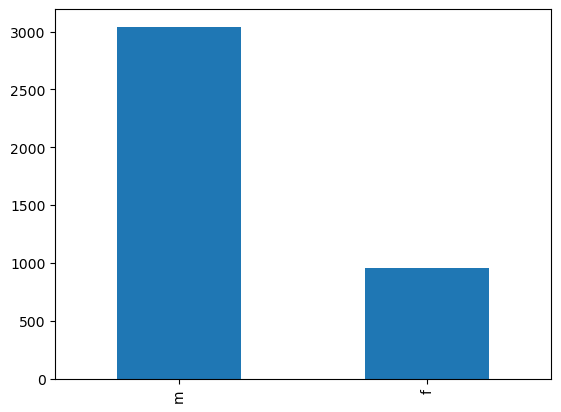

In [194]:
#male employees are 3 times more than female employees
df["Gender"].value_counts().plot(kind='bar')

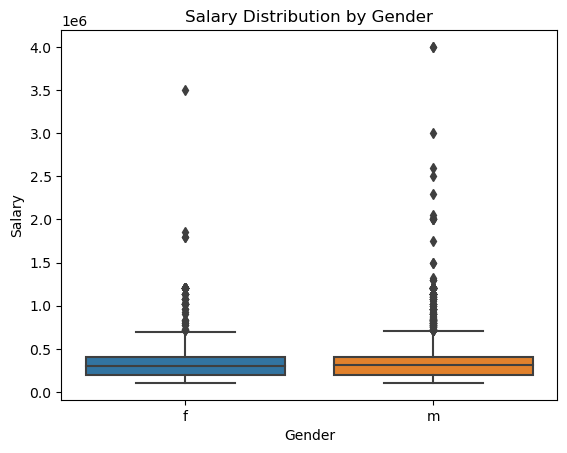

In [196]:
#salary distribution for both male and female is quite similar
#many outliers in data where male outlier is higher which means there are male employees that are getting higher pay than female
#not much difference in median salary of male and female
sns.boxplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

Text(0.5, 1.0, 'Salary levels by specialization')

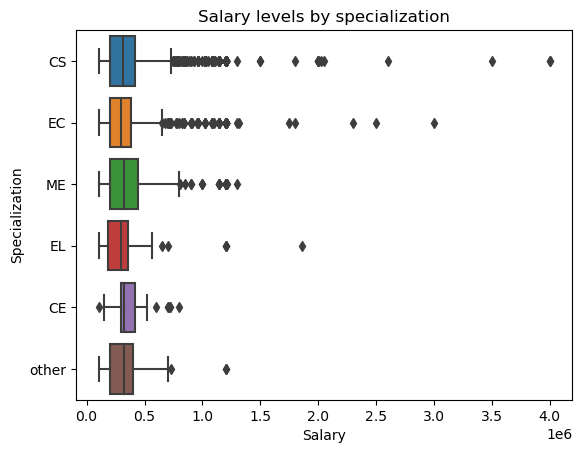

In [197]:
#there is no drastic difference in median salary of people with diff specialization
#CS/EC specialized employees are getting higher salary 
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.title('Salary levels by specialization')

<AxesSubplot: xlabel='Specialization', ylabel='Salary'>

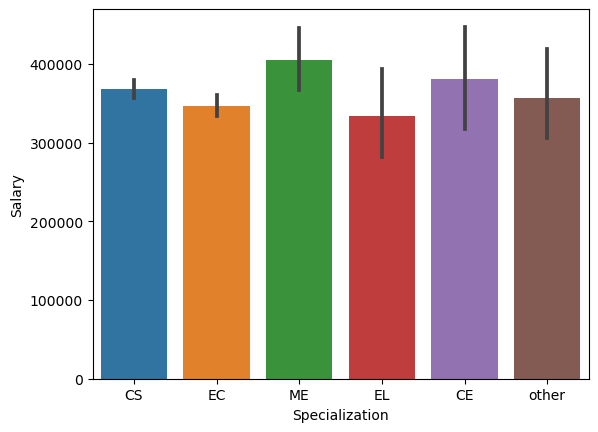

In [221]:
#ME & CE Branch earns the highest avg pay
#Other branches earn similar
sns.barplot(data=df,x='Specialization',y='Salary')

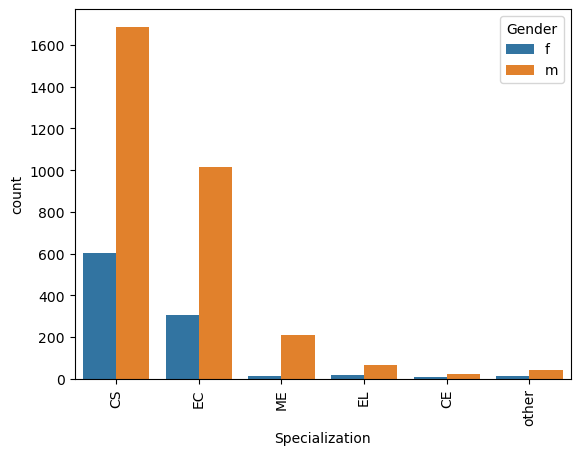

In [199]:
#all specialization are dominated by males by a significant difference
#both male and female prefer CS and EC as there is a significant diff compared to other specialization
sns.countplot(x='Specialization',hue='Gender',data=df)
plt.xticks(rotation=90)
plt.yticks()
plt.show()

<AxesSubplot: >

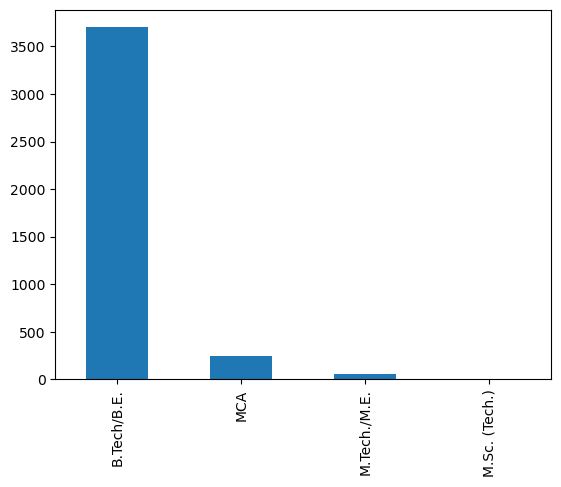

In [200]:
#Most employees are from Btech
df["Degree"].value_counts().plot(kind="bar")

In [216]:
#top 10 designation
top_designation = df['Designation'].value_counts()[:10].index.tolist()

In [217]:
top_designation_df = df[df['Designation'].isin(top_designation)]

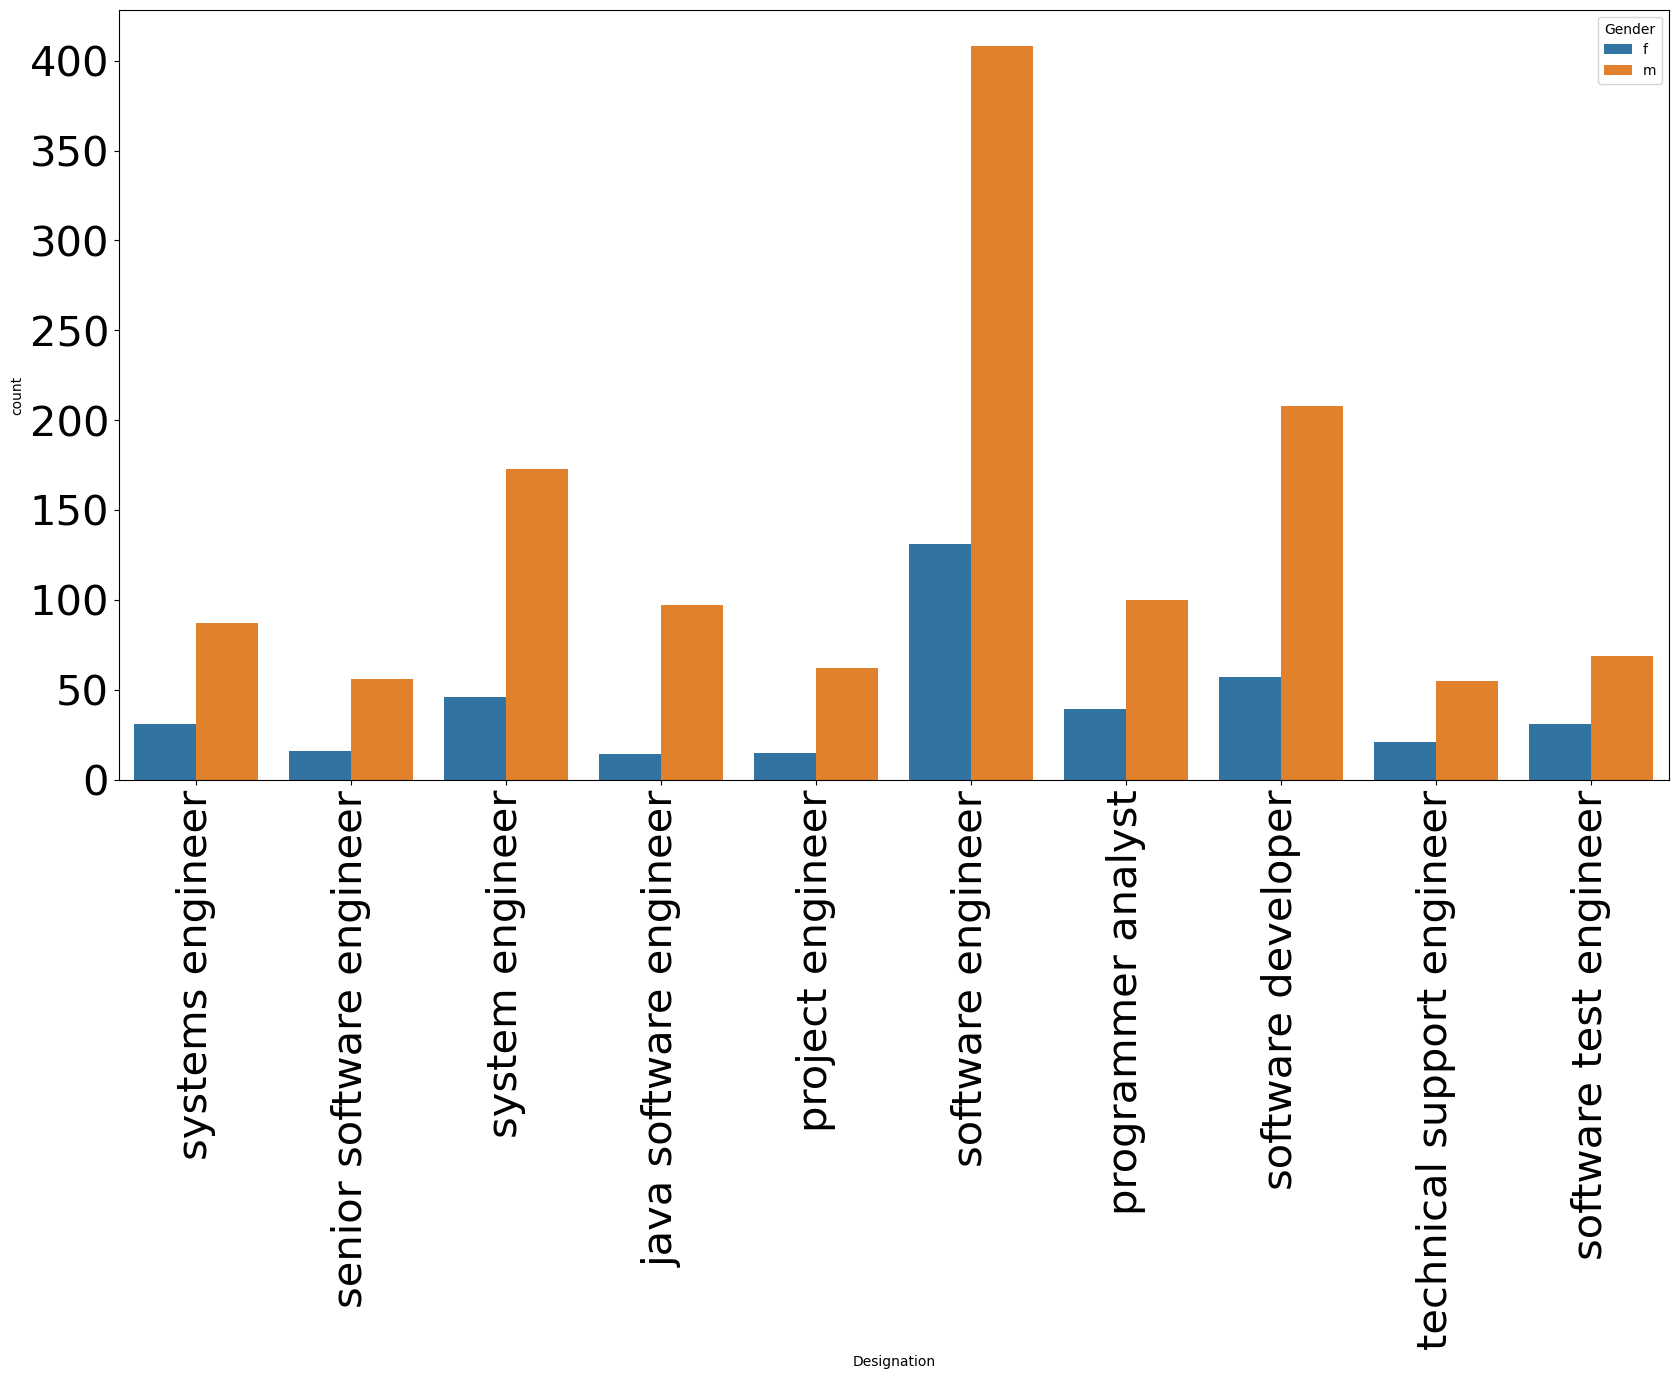

In [219]:
#all the roles are IT and are more dominated by males than females
#software engineer is the most chosen designation
plt.figure(figsize=(20,10))
sns.countplot(x='Designation',hue='Gender',data=top_designation_df)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

<AxesSubplot: xlabel='CollegeTier', ylabel='Salary'>

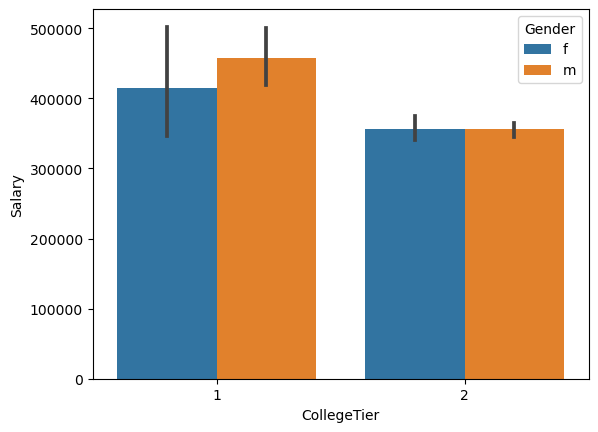

In [222]:
#students from tier1 colleges earn higher salary
sns.barplot(data=df,x='CollegeTier',y='Salary',hue='Gender')

In [223]:
#Majority of women are from tier2, hence maybe the reason why women are earning less compared to men
df.groupby('CollegeTier').Gender.value_counts()

CollegeTier  Gender
1            m          246
             f           51
2            m         2795
             f          906
Name: Gender, dtype: int64

In [226]:
#top 10 City
top_city = df['JobCity'].value_counts()[:10].index.tolist()

In [227]:
top_city_df = df[df['JobCity'].isin(top_city)]

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

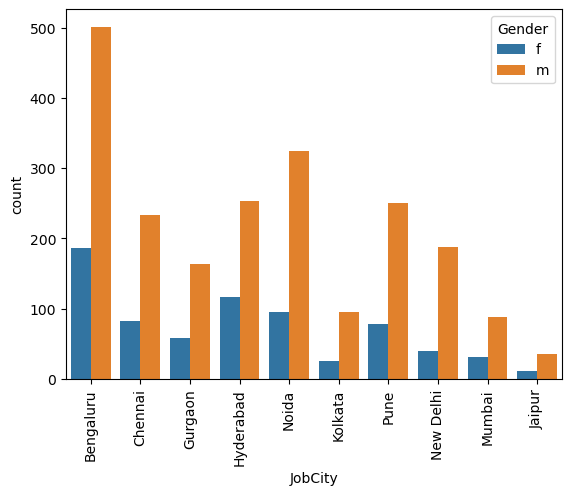

In [228]:
#Most of the employees from in Bengaluru followed by Noida,Hyderabad,Pune,Chennai and New Delhi.
sns.countplot(x="JobCity",data=top_city_df,hue="Gender")
plt.xticks(rotation=90)
plt.yticks()

<AxesSubplot: xlabel='Period', ylabel='Salary'>

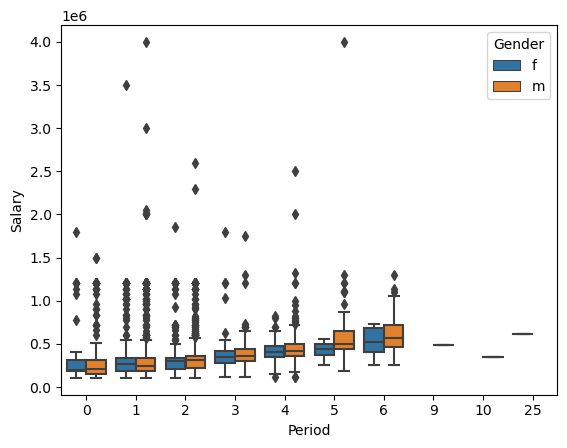

In [244]:
#both male and female salary is slightly increasing as the year of exp increase
sns.boxplot(data=df,x='Period',y='Salary',hue='Gender')

In [235]:
#Testing times of India claim
test_data=df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Period"]==0)]

<AxesSubplot: xlabel='Designation', ylabel='Salary'>

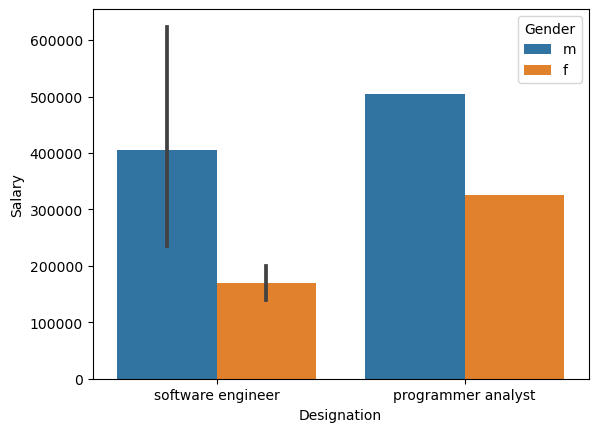

In [236]:
#Freashers are earning starting of 2 lakhs which supports the claim
sns.barplot(x="Designation",y="Salary",hue="Gender",data=test_data)

## Observations 

Male Amcat Aspirants are 3x more than female

Btech degree with CE/EC are getting higher salary

Most chosen designation is software engineer and most of them work in Bengaluru, followed by Noida,Hyderabad,Pune,Chennai and New Delhi.

All designation are dominated by male employees

Tier1 college graduates earns higher than tier 2, where males are dominating and getting higher pay. Majority of females graduate from tier2, maybe thats the reason why males dominate since less female graduates from tier1.
